In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_chrun_encoded.csv')
df = df.sample(frac=0.25, random_state=3)
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,...,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,...,1687.95,1,93.775000,1,0,0,0,0,1,0
2170,1,0,0,0,30,1,0,0,0,0,...,2555.90,1,85.196667,1,0,0,0,0,1,0
4230,0,0,0,0,5,1,0,0,0,1,...,346.40,1,69.280000,0,0,0,0,0,1,0
510,0,0,0,0,61,1,1,1,0,1,...,6300.15,0,103.281148,1,0,0,0,0,1,0


In [3]:
df.shape

(1758, 25)

In [4]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 5571 to 3151
Data columns (total 25 columns):
gender                             1758 non-null int64
senior                             1758 non-null int64
partner                            1758 non-null int64
dependents                         1758 non-null int64
tenure                             1758 non-null int64
phone_service                      1758 non-null int64
multiple_lines                     1758 non-null int64
online_security                    1758 non-null int64
online_backup                      1758 non-null int64
device_protection                  1758 non-null int64
tech_support                       1758 non-null int64
streaming_tv                       1758 non-null int64
streaming_movies                   1758 non-null int64
paperless_billing                  1758 non-null int64
monthly_charges                    1758 non-null float64
total_charges                      1758 non-null float64
churn 

In [6]:
df['churn'].value_counts()

0    1318
1     440
Name: churn, dtype: int64

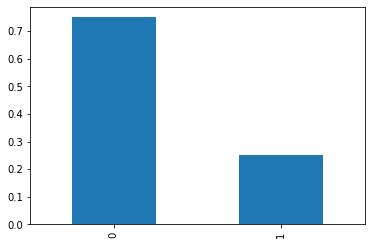

In [7]:
df['churn'].value_counts(normalize=True).plot.bar()
plt.show()

#about 25% churn

In [8]:
df=df.sample(frac=1, random_state=3)
y = df['churn']
X = df.drop('churn', axis=1)

### Building predictive algorithm using RANDOM FOREST

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### STANDARDIZING DATA

In [11]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
Xs=ss.fit_transform(X)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

Confusion matrix - train dataset: 
 [[912   0]
 [  0 318]]
Overall accuracy of model - train dataset: 1.0
AUC Score - train dataset: 1.0


Confusion matrix - test dataset: 
 [[374  32]
 [ 73  49]]
Overall accuracy of model - test dataset: 0.8011363636363636
AUC Score - test dataset: 0.8204595009286925


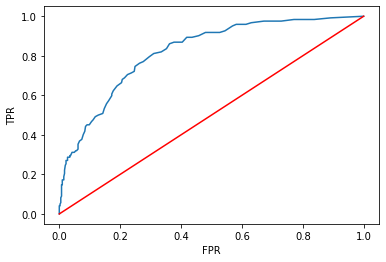

In [14]:
rfc = RandomForestClassifier()

rfc.fit(X_trains, y_train) 

y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Hyperparameter Tuning of Random Forest

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
from scipy.stats import randint as sp_randint

In [17]:
rfc = RandomForestClassifier(random_state=3)  #rfc will be estimator

params = {
    'n_estimators' : sp_randint(50,200),  #n_estimators taken as a range between 50 and 200 as only approx 8000 (data is not large)
    'max_features' : sp_randint(1,24),     #how mnay features to be considered at each split
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,20),
    'min_samples_leaf' : sp_randint(1,20),
    'criterion' : ['gini','entropy']
}

rsearch_rfc = RandomizedSearchCV(rfc, param_distributions=params, n_iter=200, cv=3, scoring='roc_auc', random_state=3,\
                   return_train_score=True, n_jobs=-1)

rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [18]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 9,
 'min_samples_split': 12,
 'n_estimators': 176}

In [19]:
pd.DataFrame(rsearch_rfc.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.161237,0.006219,0.019282,0.000471,gini,2,4,9,2,71,...,0.820193,0.860391,0.839695,0.016432,86,0.851891,0.863141,0.847861,0.854298,0.006466
1,1.019275,0.002157,0.073469,0.004910,entropy,5,11,12,11,188,...,0.825686,0.857776,0.842070,0.013109,51,0.891880,0.896644,0.884538,0.891021,0.004980
2,0.776922,0.024645,0.044216,0.007567,entropy,9,7,1,14,143,...,0.820061,0.853588,0.837466,0.013717,108,0.959899,0.963312,0.959532,0.960914,0.001702


In [20]:
#rank_test_score = 1 best parameter

Confusion matrix - train dataset: 
 [[878  34]
 [199 119]]
Overall accuracy of model - train dataset: 0.8105691056910569
AUC Score - train dataset: 0.8821892585236677


Confusion matrix - test dataset: 
 [[395  11]
 [ 86  36]]
Overall accuracy of model - test dataset: 0.8162878787878788
AUC Score - test dataset: 0.8410623435354921


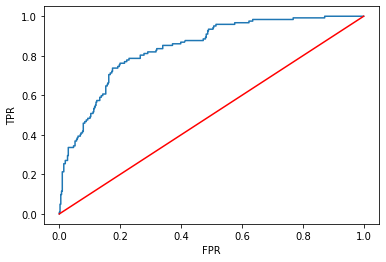

In [21]:
#Evaluating model
rfc = RandomForestClassifier(**rsearch_rfc.best_params_, random_state=3)

rfc.fit(X_trains, y_train) 

y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [22]:
imp = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['Importance'])
imp = imp.sort_values(by='Importance', ascending=False)
imp

#if tenure is removed from model, then accuracy of model will drop by 16%
#similarly, for other features
#Importance shows how much accuracy will decrease if a feature is removed
#can be used for feature selection, but features can be removed only if importnace is zero
#here, no features should be removed

,Importance
tenure,0.182188
total_charges,0.109298
internet_service-fiber_optic,0.100839
avg_monthly_charges,0.080014
contract-two_year,0.079618
payment_method-electronic_check,0.072493
monthly_charges,0.071749
internet_service-no,0.041828
tech_support,0.038926
online_security,0.035799


### k-NN Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

In [33]:
knn = KNeighborsClassifier()

params = {'n_neighbors' : sp_randint(1,15), #min is 1
         'p' : sp_randint(1,5)} #p = coeffciient of distance calculation

rsearch_knn=RandomizedSearchCV(knn, param_distributions=params, cv=3, n_iter=50,return_train_score=True, \
                               random_state=3, n_jobs=-1)

rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001659350FE08>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001659365DF88>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [36]:
rsearch_knn.best_params_

{'n_neighbors': 10, 'p': 2}

Confusion matrix - train dataset: 
 [[845  67]
 [146 172]]
Overall accuracy of model - train dataset: 0.8268292682926829
AUC Score - train dataset: 0.8789187493103829


Confusion matrix - test dataset: 
 [[368  38]
 [ 63  59]]
Overall accuracy of model - test dataset: 0.8087121212121212
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       406
           1       0.61      0.48      0.54       122

    accuracy                           0.81       528
   macro avg       0.73      0.70      0.71       528
weighted avg       0.80      0.81      0.80       528

AUC Score - test dataset: 0.7977570055721553


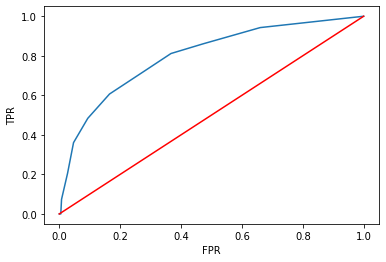

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

knn = KNeighborsClassifier(**rsearch_knn.best_params_)

knn.fit(X_trains, y_train) 

y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
#wherevere, prediction of positives are critical print classification report
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### STACKING RESULTS OF 3 LEARNERS (Random Forest, K-NN, Logistic Regression)

In [38]:
from sklearn.linear_model import LogisticRegression

Confusion matrix - train dataset: 
 [[827  85]
 [148 170]]
Overall accuracy of model - train dataset: 0.8105691056910569
AUC Score - train dataset: 0.8557665783956746


Confusion matrix - test dataset: 
 [[367  39]
 [ 62  60]]
Overall accuracy of model - test dataset: 0.8087121212121212


Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       406
           1       0.61      0.49      0.54       122

    accuracy                           0.81       528
   macro avg       0.73      0.70      0.71       528
weighted avg       0.80      0.81      0.80       528

AUC Score - test dataset: 0.842344343050957


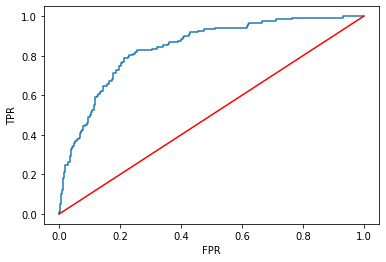

In [39]:
lr = LogisticRegression(solver='liblinear')

lr.fit(X_trains, y_train)

#model evaluation code:
lr.fit(X_trains, y_train)

y_train_pred = lr.predict(X_trains)
y_train_prob = lr.predict_proba(X_trains)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lr.predict(X_tests)
y_test_prob = lr.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
#wherevere, prediction of positives are critical print classification report
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [40]:
from sklearn.ensemble import VotingClassifier

In [42]:
lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(**rsearch_knn.best_params_)
rfc = RandomForestClassifier(**rsearch_rfc.best_params_, random_state=3)

In [59]:
## Hard Voting

clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)],
                      voting='hard')

clf.fit(X_trains, y_train)

y_train_pred = clf.predict(X_trains)
y_test_pred = clf.predict(X_tests)
#create predicted zeroes and ones for all three models and then take average using majority voting


print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))

Accuracy score - Train:  0.8113821138211382
Accuracy score - Test:  0.8143939393939394


Overall result of all three models. AUC score cannot be checked as 'hard' method of aggragtion/voting of stacking is used.
'predict_proba' cannot be used in hard voting.

hard voting does not take probability into consideration. decided basis the mode only.

Confusion matrix - train dataset: 
 [[845  67]
 [150 168]]
Overall accuracy of model - train dataset: 0.8235772357723578
AUC Score - train dataset: 0.8824961381441025


Confusion matrix - test dataset: 
 [[376  30]
 [ 67  55]]
Overall accuracy of model - test dataset: 0.8162878787878788


Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       406
           1       0.65      0.45      0.53       122

    accuracy                           0.82       528
   macro avg       0.75      0.69      0.71       528
weighted avg       0.80      0.82      0.80       528



AUC Score - test dataset: 0.8367519987079061


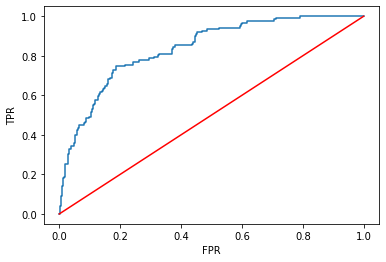

In [60]:
## Soft Voting - Equal Weightages

clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)],  # all these 3 have the best parameters
                      voting='soft')

clf.fit(X_trains, y_train)

y_train_pred = clf.predict(X_trains)
#use model result to predict the predicted values on the 3 models sequentially and then get an average of all 3 models
y_train_prob = clf.predict_proba(X_trains)[:,1]
##use model result to predict the prob on the 3 models sequentially and then get an average of all 3 models

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
#wherevere, prediction of positives are critical print classification report
print('\n')
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Confusion matrix - train dataset: 
 [[854  58]
 [159 159]]
Overall accuracy of model - train dataset: 0.8235772357723578
AUC Score - train dataset: 0.8863097208429881


Confusion matrix - test dataset: 
 [[380  26]
 [ 70  52]]
Overall accuracy of model - test dataset: 0.8181818181818182


Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       406
           1       0.67      0.43      0.52       122

    accuracy                           0.82       528
   macro avg       0.76      0.68      0.70       528
weighted avg       0.80      0.82      0.80       528



AUC Score - test dataset: 0.8352782039893403


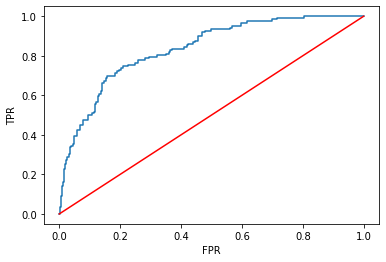

In [61]:
## Soft Voting -Different Weightages:

clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)],  # all these 3 have the best parameters
                      weights=[1,2,3], voting='soft')

#1-least weightage (1/6) to lr
#2-second least weightage (2/6) to knn
#3-highest weightage (3/6) to rfc

clf.fit(X_trains, y_train)

y_train_pred = clf.predict(X_trains)
#use model result to predict the predicted values on the 3 models sequentially and then get an average of all 3 models
y_train_prob = clf.predict_proba(X_trains)[:,1]
##use model result to predict the prob on the 3 models sequentially and then get an average of all 3 models

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
#wherevere, prediction of positives are critical print classification report
print('\n')
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()